# **120 años de historia olimpica: Tarea 1**

### **Procesos inciales**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_olimpic=pd.read_csv("https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv")
data_olimpic.shape

(271116, 15)

Dado que es de interéz estudiar la data olimpica registrada en el 2016, se filtrará la base de datos original a una con unicamente los datos del año de interés.

In [5]:
data_olimpic_2016=data_olimpic.loc[data_olimpic['Year']==2016]
data_olimpic_2016.shape

(13688, 15)

In [6]:
final_2016=data_olimpic_2016.loc[data_olimpic_2016["Medal"].notna()]
final_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Veamos en que deporte se obtuvieron mayor numero de medallas.

In [7]:
med_dep=pd.crosstab(index=final_2016['Sport'], columns="count", colnames=None)
(med_dep.sort_values(by=["count"],ascending=False)).head()

col_0,count
Sport,
Athletics,192
Swimming,191
Rowing,144
Football,106
Hockey,99


De esta manera vemos que los deportes con mayor número de medallas en el 2016 fueron **Atletismo**, **Natación**, **Remo**, **Futbol** y **Hockey**. Filtremos nuestro DataFrame por estos cinco deporte.

In [9]:
def five_import(x):
    return x in ["Rowing", "Athletics", "Swimming", "Football", "Hockey"]
    

dep5_2016=final_2016.loc[final_2016["Sport"].apply(five_import)]
dep5_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Al obtener el dataframe final podemos generar los gráficos de interez.

1. Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.

2. Trace un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.

3. Descubre qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.

4. Observe la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016

### **1. Número de medallas en los cinco deportes principales en 2016**

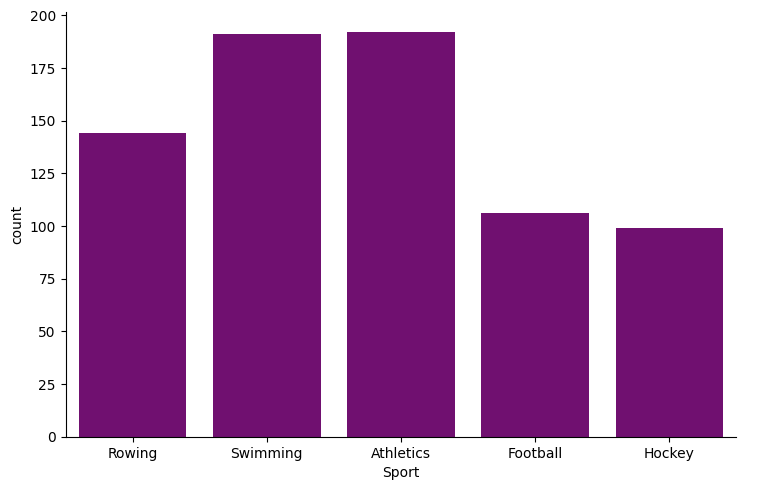

In [146]:
ax = sns.catplot(data=dep5_2016, x="Sport", aspect=1.5, kind="count", color="#800080" )

### **2. Distribución de la edad de los ganadores de los mejores cinco deportes en 2016**

<Axes: xlabel='Age', ylabel='Count'>

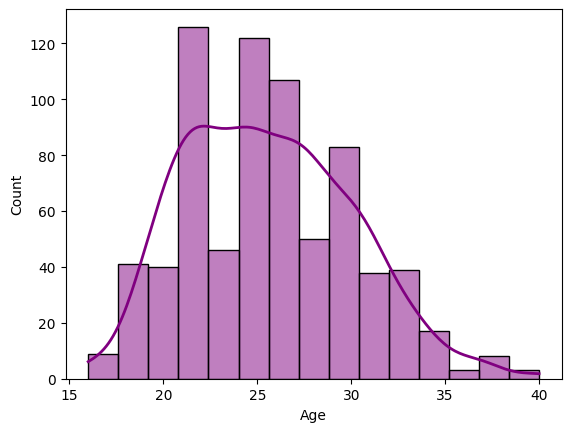

In [145]:
sns.histplot(dep5_2016.Age, 
            color="#800080",
            kde=True,
            line_kws={"linewidth": 2}, 
            bins=15 )

### **3. Medallas ganadas por equipos en el 2016**

In [31]:
med_team=pd.crosstab(index=dep5_2016["Team"],columns="count")
best_teams=(med_team.sort_values(by=["count"],ascending=False)).head(10)
best_teams

col_0,count
Team,
United States,127
Germany,88
Great Britain,69
Canada,45
Australia,43
Netherlands,34
Jamaica,30
Sweden,21
France,20


In [36]:
def team__(x):
    return x in ["United States","Germany","Great Britain", "Canada", "Australia", "Netherlands" , "Jamaica","Sweden","France","Brazil"]
    

df_best_team=dep5_2016.loc[final_2016["Team"].apply(team__)]
df_best_team

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze
1848,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,Bronze
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261547,130868,Melanie Kate Wilson,F,32.0,184.0,75.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Coxed Eights,Silver
263025,131614,Kelsi Worrell,F,22.0,180.0,75.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold
267136,133648,Shelina Laura Zadorsky,F,23.0,172.0,67.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
268247,134211,Jos Carlos Cracco Neto,M,22.0,170.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold


<Figure size 1000x600 with 0 Axes>

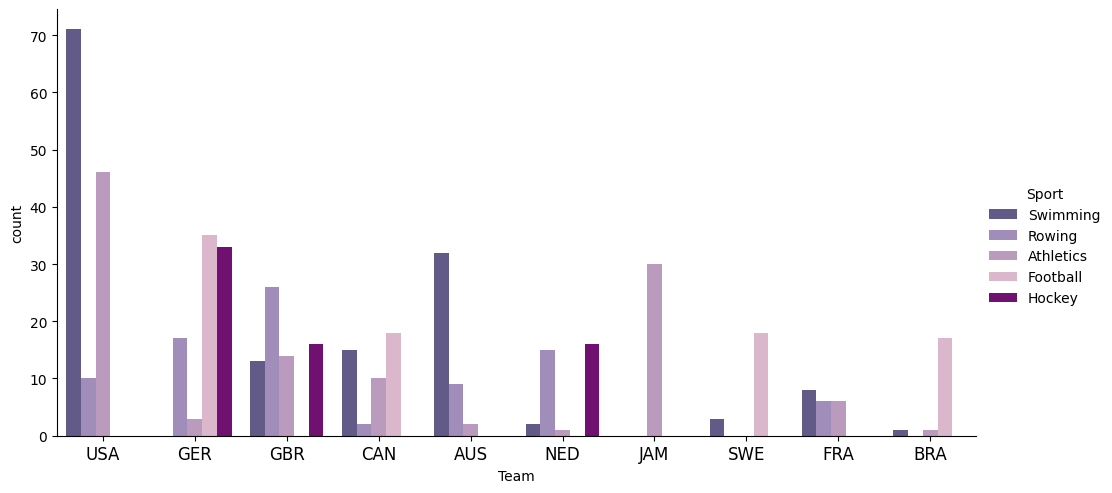

In [139]:
dep=["United States","Germany","Great Britain", "Canada", "Australia", "Netherlands" , "Jamaica","Sweden","France","Brazil"]
colors = ["#5E548E",   "#9F86C0",  "#BE95C4",  "#E0B1CB", "#800080" ]

plt.figure(figsize=(10, 6)) 
ax = sns.catplot(data=df_best_team, x="Team", aspect=2, kind="count" , palette= colors ,order=dep, hue="Sport")

new_labels = ["USA", "GER", "GBR", "CAN", "AUS", "NED", "JAM", "SWE", "FRA", "BRA"]
ax.set_xticklabels(new_labels, fontsize=12)
plt.show()

### **4. Peso medio de los jugadores del 2016 en funcion del sexo.**

<Axes: xlabel='Sport', ylabel='Weight'>

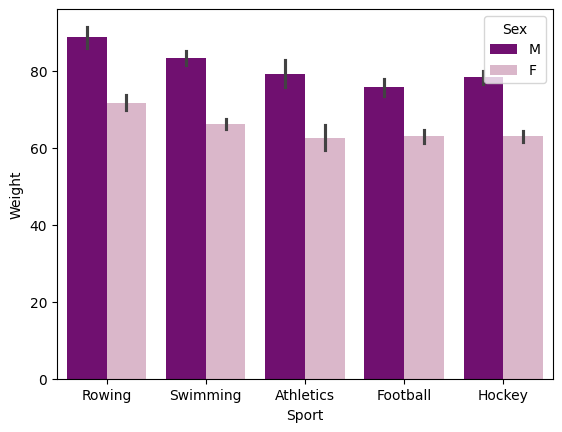

In [147]:
colors = ["#800080", "#E0B1CB"]
sns.barplot(x="Sport", y="Weight", hue="Sex", data= dep5_2016, palette=colors)
